Please upload your image file (e.g., lena.png):


Saving Lena.png to Lena (6).png


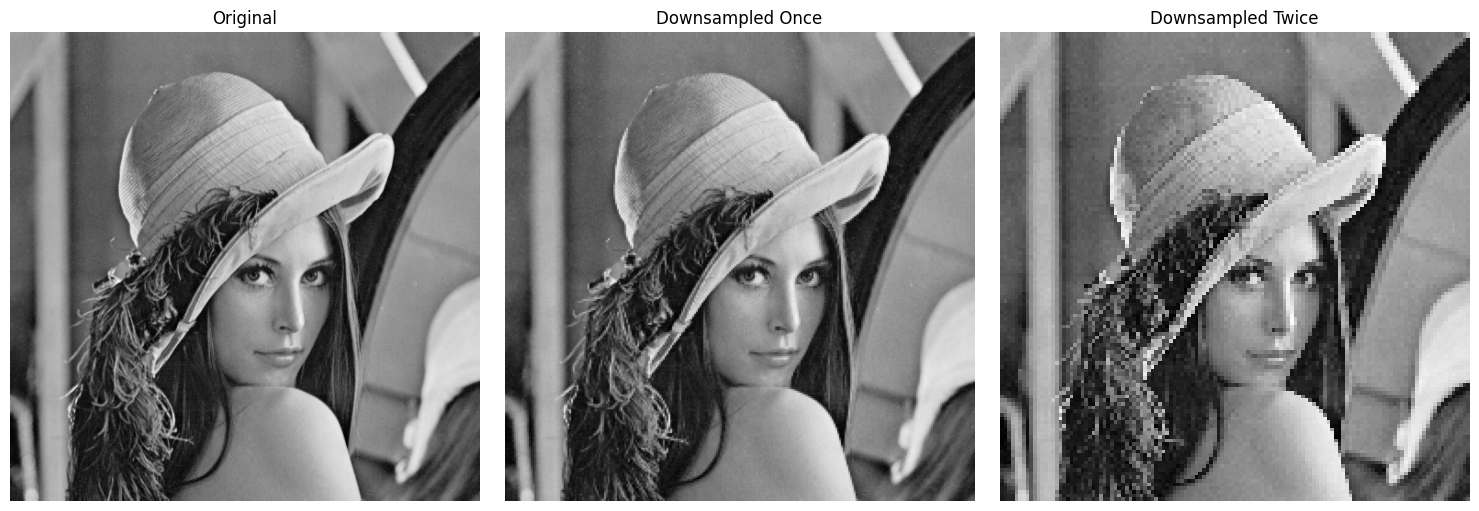

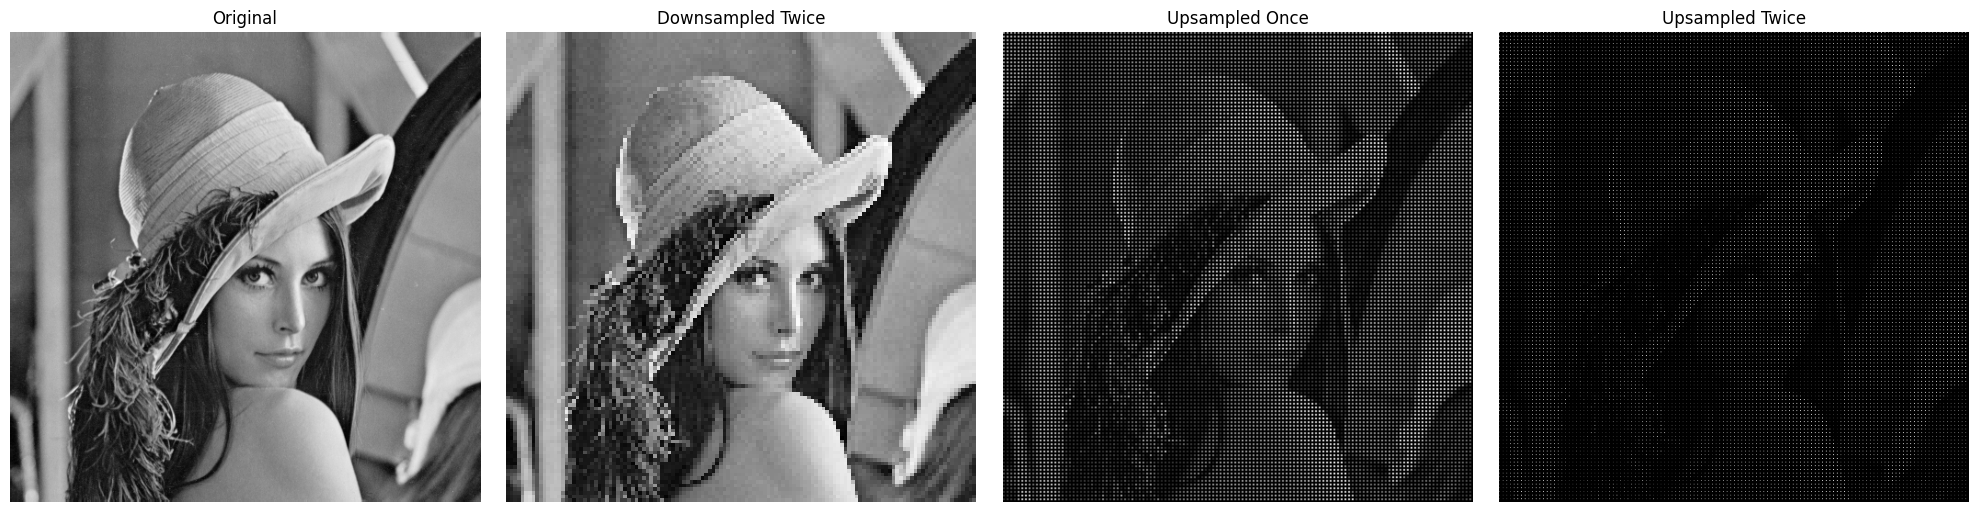

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO

#uploading an image and converting it to grayscale
def upload_and_load_image():
    uploaded = files.upload()
    file_name = next(iter(uploaded))
    img = Image.open(BytesIO(uploaded[file_name])).convert('L')
    return np.array(img).astype(float) / 255.0

#downsampling the image by half in both dimensions
def downsample(img):
    return img[::2, ::2]

#upsampling the image by doubling its size and inserting empty pixels
def upsample(img):
    h, w = img.shape
    upsampled = np.zeros((h*2, w*2))
    upsampled[::2, ::2] = img
    return upsampled

def display_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    if n == 1:
        axes = [axes]
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

#uploading and load the original image
print("Please upload your image file:")
original = upload_and_load_image()

#performing downsampling twice
downsampled_once = downsample(original)
downsampled_twice = downsample(downsampled_once)

#displaying original and downsampled images
display_images([original, downsampled_once, downsampled_twice],
               ['Original', 'Downsampled Once', 'Downsampled Twice'])

#performing upsampling twice on the downsampled image
upsampled_once = upsample(downsampled_twice)
upsampled_twice = upsample(upsampled_once)

#displaying original, downsampled, and upsampled images
display_images([original, downsampled_twice, upsampled_once, upsampled_twice],
               ['Original', 'Downsampled Twice', 'Upsampled Once', 'Upsampled Twice'])